## 1. Data Exploration

### `01_dataset_exploration.ipynb`

Exploring Le2i Fall Detection Dataset...
Found 190 fall videos
Video: video (1).avi
Total frames: 157
FPS: 25.00
Duration: 6.28 seconds


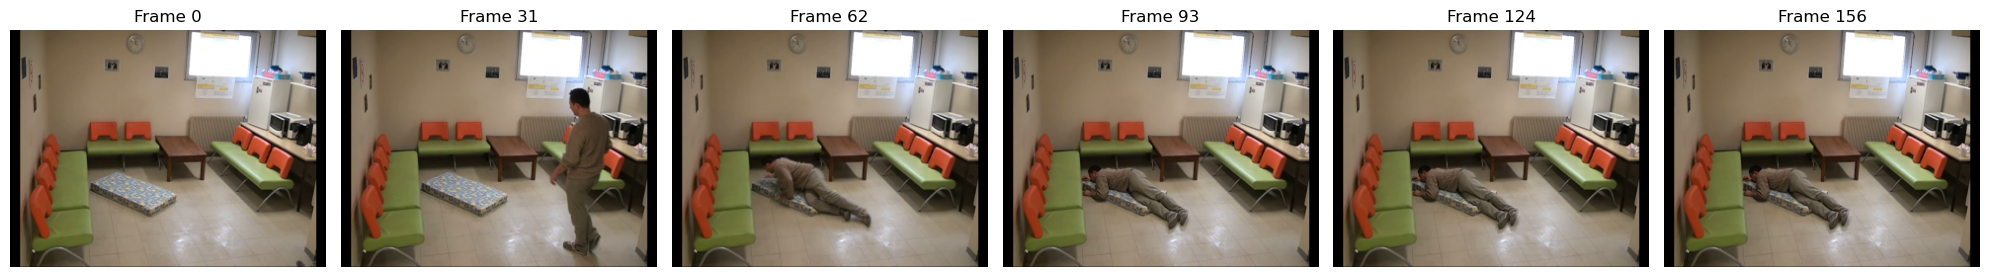

Video: video (10).avi
Total frames: 362
FPS: 25.00
Duration: 14.48 seconds


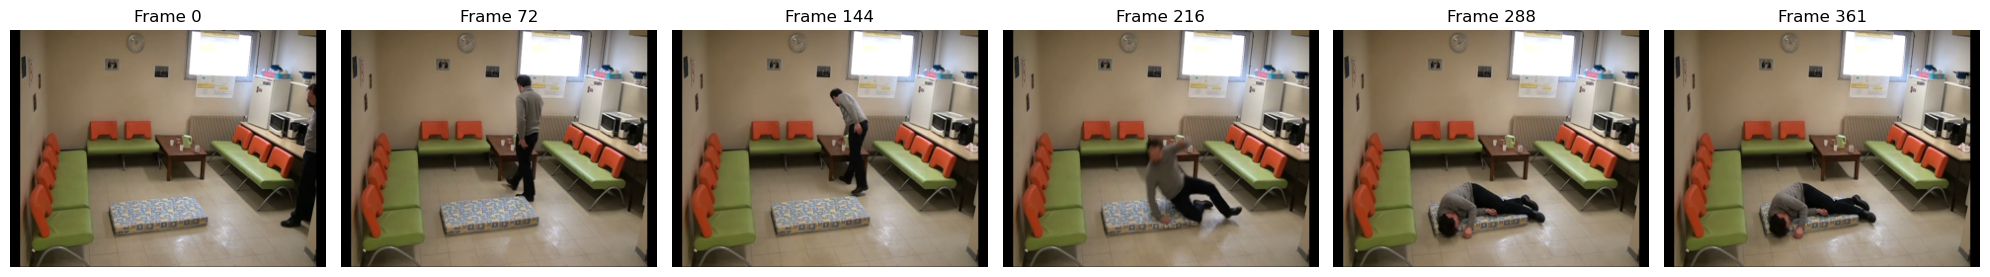

Video: video (11).avi
Total frames: 483
FPS: 25.00
Duration: 19.32 seconds


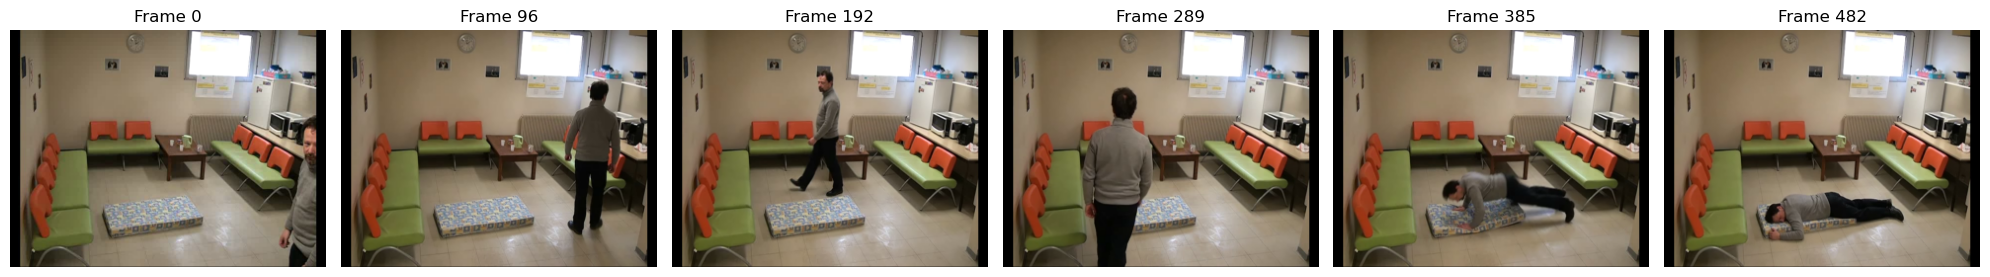


Exploring Workout Videos Dataset...
Found 590 workout videos


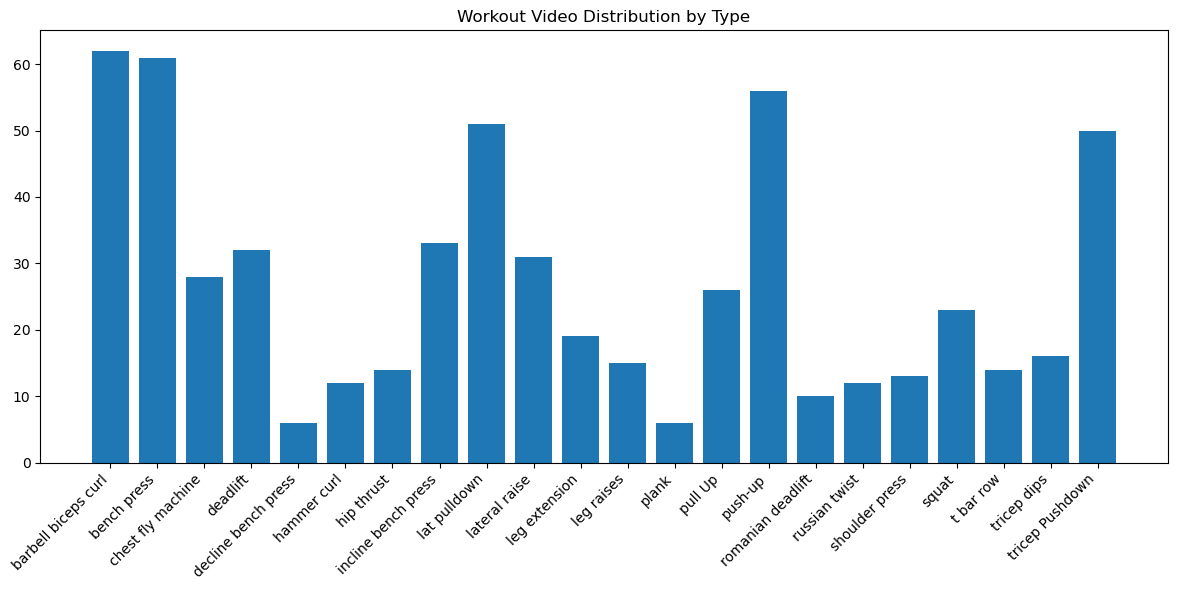

Video: barbell biceps curl_1.mp4
Total frames: 114
FPS: 29.97
Duration: 3.80 seconds


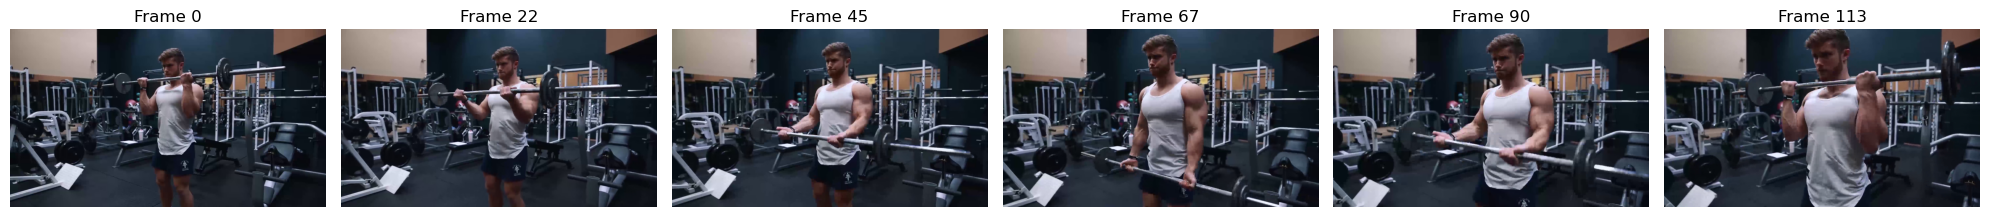

Video: barbell biceps curl_10.mp4
Total frames: 94
FPS: 29.97
Duration: 3.14 seconds


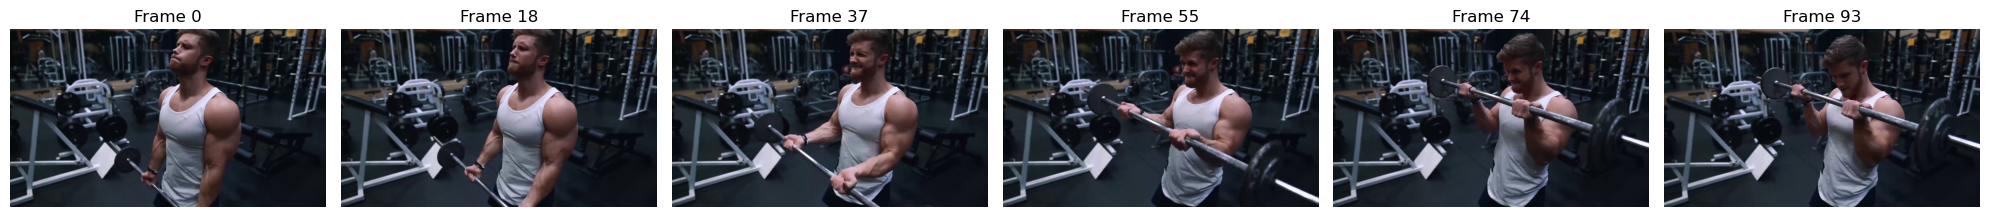

Video: barbell biceps curl_11.mp4
Total frames: 75
FPS: 29.97
Duration: 2.50 seconds


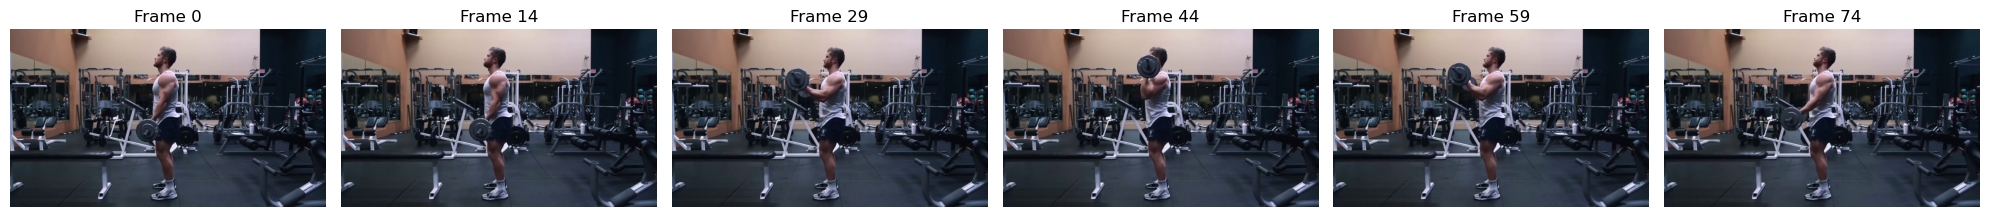


Exploring Workout Images Dataset...


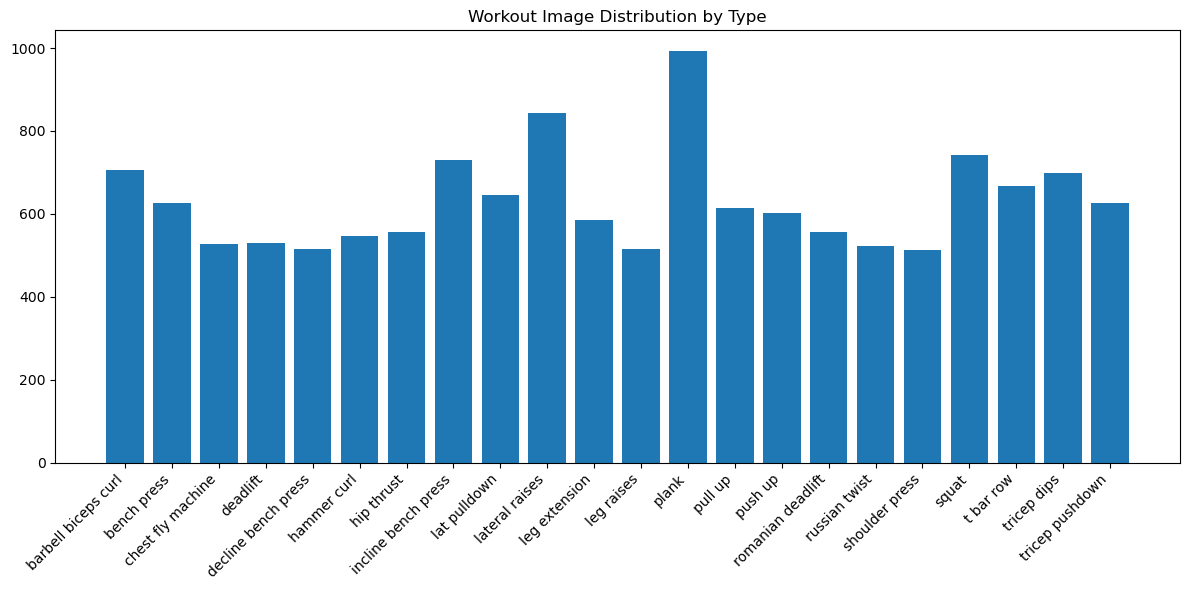

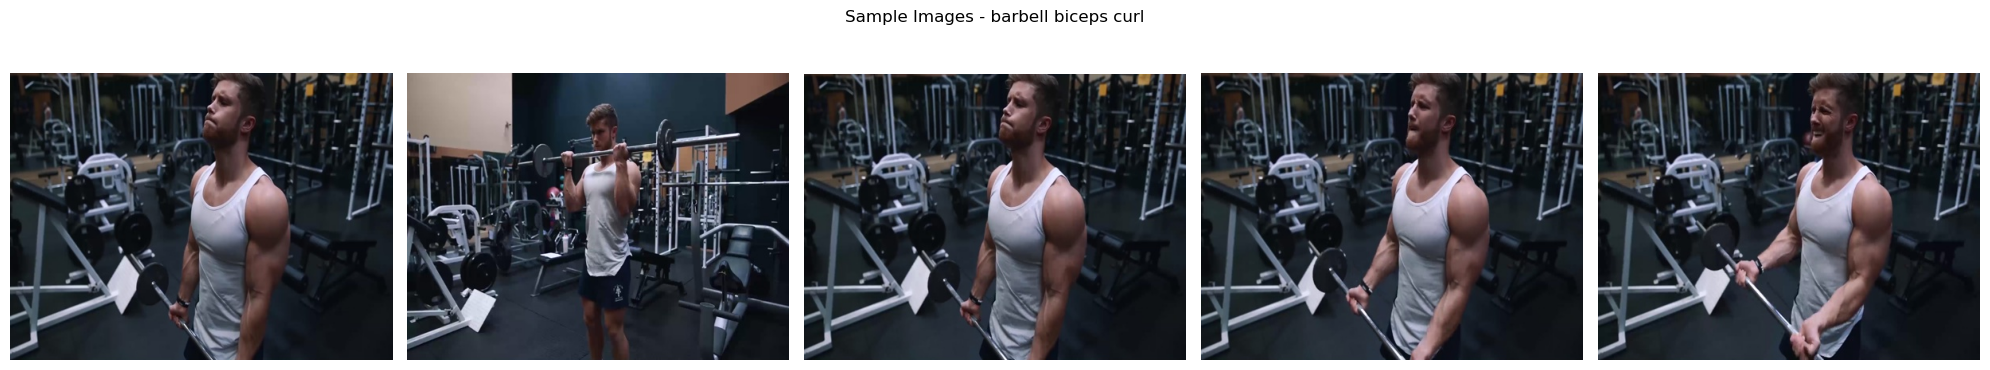

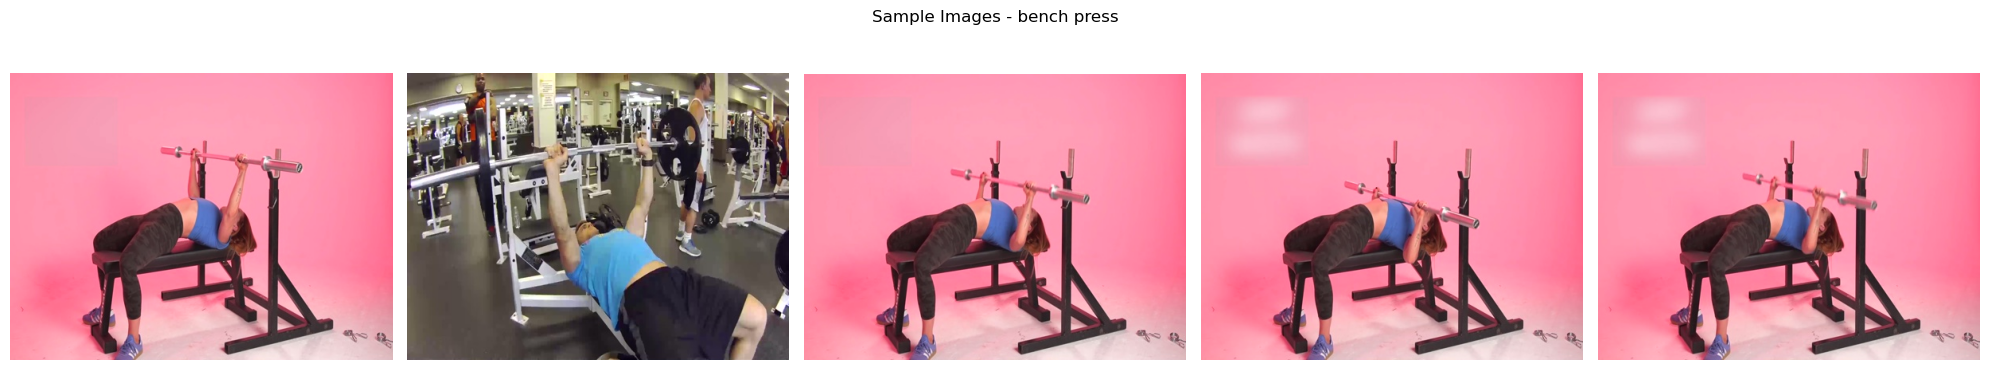

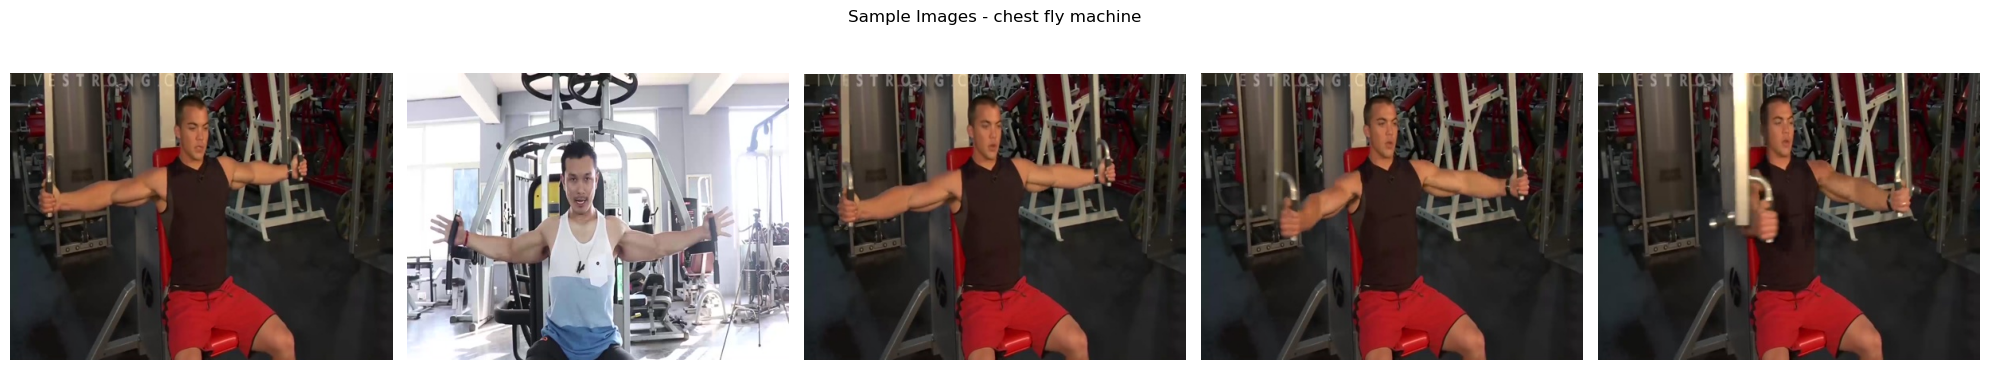

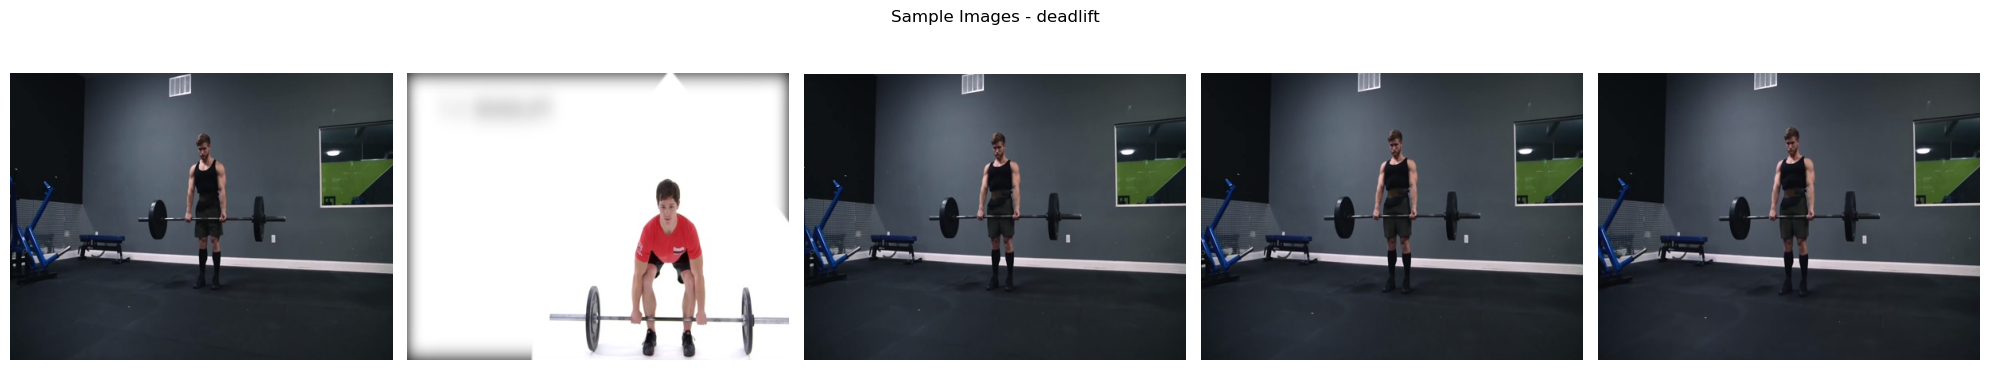

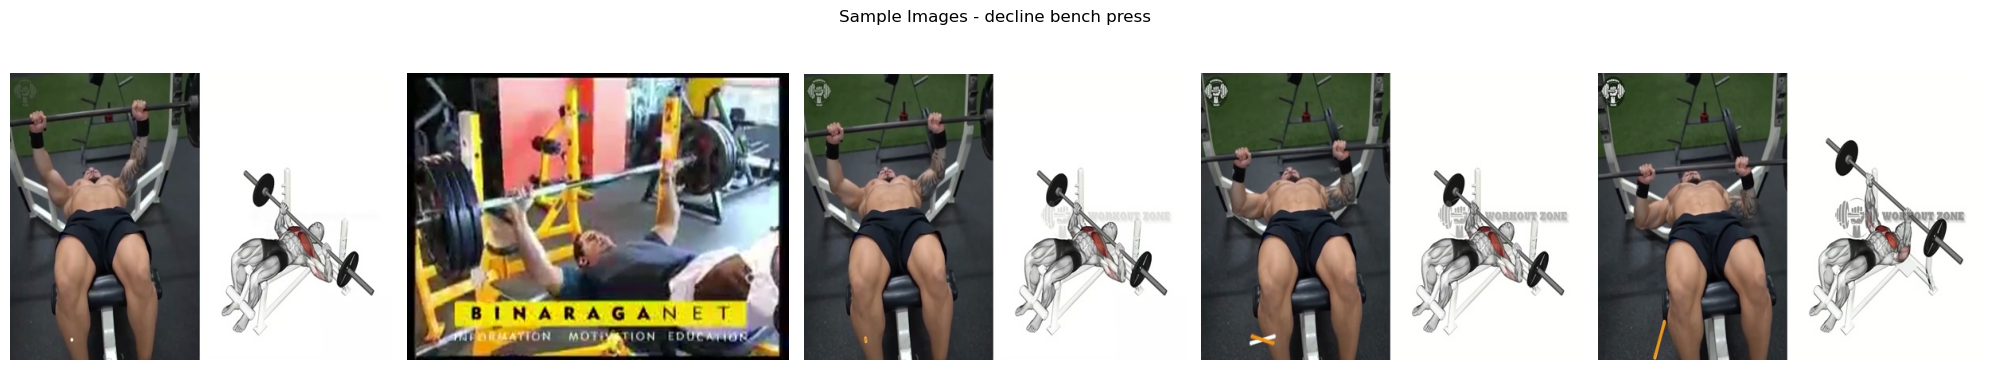

In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Set paths to your datasets
FALL_DATA_DIR = "../data/le2i"
WORKOUT_IMAGES_DIR = "../data/workout_images"
WORKOUT_VIDEOS_DIR = "../data/workout_videos"

# Function to display video frames
def display_video_frames(video_path, num_frames=6):
    """Display sample frames from a video"""
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = frame_count / fps
    
    print(f"Video: {os.path.basename(video_path)}")
    print(f"Total frames: {frame_count}")
    print(f"FPS: {fps:.2f}")
    print(f"Duration: {duration:.2f} seconds")
    
    # Get evenly spaced frame indices
    indices = np.linspace(0, frame_count-1, num_frames, dtype=int)
    
    # Create a figure to display frames
    fig, axes = plt.subplots(1, num_frames, figsize=(20, 4))
    
    for i, idx in enumerate(indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            axes[i].imshow(frame)
            axes[i].set_title(f"Frame {idx}")
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    cap.release()

# Explore fall videos
print("Exploring Le2i Fall Detection Dataset...")
fall_videos = list(Path(FALL_DATA_DIR).rglob("*.avi"))
# adl_videos = list(Path(FALL_DATA_DIR).rglob("*adl*.avi"))  # Activities of Daily Living

print(f"Found {len(fall_videos)} fall videos")
# print(f"Found {len(adl_videos)} ADL videos")

# Display sample fall videos
if fall_videos:
    for i in range(min(3, len(fall_videos))):
        display_video_frames(str(fall_videos[i]))

# Explore workout videos
print("\nExploring Workout Videos Dataset...")
workout_videos = list(Path(WORKOUT_VIDEOS_DIR).rglob("*.mp4"))
print(f"Found {len(workout_videos)} workout videos")

# Count videos by subdirectory (workout type)
workout_types = {}
for video in workout_videos:
    category = video.parent.name
    workout_types[category] = workout_types.get(category, 0) + 1

# Display workout type distribution
plt.figure(figsize=(12, 6))
plt.bar(workout_types.keys(), workout_types.values())
plt.title('Workout Video Distribution by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display sample workout videos
if workout_videos:
    for i in range(min(3, len(workout_videos))):
        display_video_frames(str(workout_videos[i]))

# Explore workout images
print("\nExploring Workout Images Dataset...")
workout_images_dirs = [d for d in os.listdir(WORKOUT_IMAGES_DIR) 
                      if os.path.isdir(os.path.join(WORKOUT_IMAGES_DIR, d))]

image_counts = {}
for d in workout_images_dirs:
    image_dir = os.path.join(WORKOUT_IMAGES_DIR, d)
    image_files = [f for f in os.listdir(image_dir) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts[d] = len(image_files)

# Display image count by category
plt.figure(figsize=(12, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.title('Workout Image Distribution by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display sample images from each category
for category in list(image_counts.keys())[:5]:  # Show first 5 categories
    image_dir = os.path.join(WORKOUT_IMAGES_DIR, category)
    image_files = [f for f in os.listdir(image_dir) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        continue
        
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    plt.suptitle(f'Sample Images - {category}')
    
    for i in range(min(5, len(image_files))):
        img_path = os.path.join(image_dir, image_files[i])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
